# v1

In [9]:
import numpy as np
import random

class Rectangle:
    def __init__(self, height, width, value):
        self.height = height
        self.width = width
        self.value = value

class PositionedRectangle(Rectangle):
    def __init__(self, height, width, value, x, y):
        super().__init__(height, width, value)
        self.x = x
        self.y = y

def initialize_population(rectangles, population_size, circle_radius):
    population = []
    for _ in range(population_size):
        individual = []
        for rect in rectangles:
            while True:
                x = random.uniform(-circle_radius, circle_radius)
                y = random.uniform(-circle_radius, circle_radius)
                if is_within_circle(x, y, rect.width, rect.height, circle_radius):
                    individual.append(PositionedRectangle(rect.height, rect.width, rect.value, x, y))
                    break
        population.append(individual)
    return population

def is_within_circle(x, y, width, height, radius):
    # sprawdzenie czy wszystkie rogi prostokąta są w kole
    corners = [(x, y), (x + width, y), (x, y + height), (x + width, y + height)]
    for corner in corners:
        if np.sqrt(corner[0]**2 + corner[1]**2) > radius:
            return False
    return True

def rectangles_do_not_overlap(rect1, rect2):
    # sprawdzenie czy dwa prostokąty nie nachodzą na siebie
    return (rect1.x + rect1.width <= rect2.x or rect2.x + rect2.width <= rect1.x or
            rect1.y + rect1.height <= rect2.y or rect2.y + rect2.height <= rect1.y)

def fitness(individual, circle_radius):
    total_value = 0
    for i, rect1 in enumerate(individual):
        if is_within_circle(rect1.x, rect1.y, rect1.width, rect1.height, circle_radius):
            overlap = False
            for j, rect2 in enumerate(individual):
                if i != j and not rectangles_do_not_overlap(rect1, rect2):
                    overlap = True
                    break
            if not overlap:
                total_value += rect1.value
    return total_value

def mutate(individual, circle_radius):
    for rect in individual:
        if random.random() < 0.2:
            while True:
                rect.x = random.uniform(-circle_radius, circle_radius)
                rect.y = random.uniform(-circle_radius, circle_radius)
                if is_within_circle(rect.x, rect.y, rect.width, rect.height, circle_radius):
                    break
    return individual

def crossover(parent1, parent2):
    if random.random() < 0.7:
        point = random.randint(0, len(parent1) - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    return parent1, parent2

def genetic_algorithm(rectangles, circle_radius, population_size=100, generations=1000):
    population = initialize_population(rectangles, population_size, circle_radius)
    
    for generation in range(generations):
        population = sorted(population, key=lambda x: fitness(x, circle_radius), reverse=True)
        new_population = population[:10]  # Elitizm
        
        while len(new_population) < population_size:
            parent1 = random.choice(population[:50])  # Turniej
            parent2 = random.choice(population[:50])
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1, circle_radius), mutate(child2, circle_radius)])
        
        population = new_population

    best_individual = max(population, key=lambda x: fitness(x, circle_radius))
    return best_individual, fitness(best_individual, circle_radius)

rectangles = [
    Rectangle(2, 3, 5),
    Rectangle(1, 4, 3),
    Rectangle(3, 3, 6),
]

circle_radius = 10
best_individual, best_fitness = genetic_algorithm(rectangles, circle_radius, generations=10000)

print("Najlepsze rozmieszczenie prostokątów:")
for rect in best_individual:
    print(f"Prostokąt: wysokość={rect.height}, szerokość={rect.width}, wartość={rect.value}, x={rect.x}, y={rect.y}")
print("Najlepsza wartość:", best_fitness)


Najlepsze rozmieszczenie prostokątów:
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=-6.481949797841486, y=-2.880192851194627
Prostokąt: wysokość=1, szerokość=4, wartość=3, x=-0.651422167013278, y=4.520957382094705
Prostokąt: wysokość=3, szerokość=3, wartość=6, x=3.2151216666285247, y=-1.4762913418811419
Najlepsza wartość: 14


# v2

In [17]:
import numpy as np
import random

class Rectangle:
    def __init__(self, height, width, value):
        self.height = height
        self.width = width
        self.value = value

class PositionedRectangle(Rectangle):
    def __init__(self, height, width, value, x, y):
        super().__init__(height, width, value)
        self.x = x
        self.y = y

def initialize_population(rectangles, population_size, circle_radius):
    population = []
    for _ in range(population_size):
        individual = []
        for rect in rectangles:
            for _ in range(1000):  # Próbuj wielokrotnie wstawić prostokąt
                x = random.uniform(-circle_radius, circle_radius)
                y = random.uniform(-circle_radius, circle_radius)
                if is_within_circle(x, y, rect.width, rect.height, circle_radius) and can_place(individual, rect, x, y):
                    individual.append(PositionedRectangle(rect.height, rect.width, rect.value, x, y))
        population.append(individual)
    return population

def is_within_circle(x, y, width, height, radius):
    corners = [(x, y), (x + width, y), (x, y + height), (x + width, y + height)]
    for corner in corners:
        if np.sqrt(corner[0]**2 + corner[1]**2) > radius:
            return False
    return True

def rectangles_do_not_overlap(rect1, rect2):
    return (rect1.x + rect1.width <= rect2.x or rect2.x + rect2.width <= rect1.x or
            rect1.y + rect1.height <= rect2.y or rect2.y + rect2.height <= rect1.y)

def can_place(individual, new_rect, x, y):
    new_rect_pos = PositionedRectangle(new_rect.height, new_rect.width, new_rect.value, x, y)
    for rect in individual:
        if not rectangles_do_not_overlap(rect, new_rect_pos):
            return False
    return True

def fitness(individual, circle_radius):
    total_value = 0
    for i, rect1 in enumerate(individual):
        if is_within_circle(rect1.x, rect1.y, rect1.width, rect1.height, circle_radius):
            overlap = False
            for j, rect2 in enumerate(individual):
                if i != j and not rectangles_do_not_overlap(rect1, rect2):
                    overlap = True
                    break
            if not overlap:
                total_value += rect1.value
    return total_value

def mutate(individual, circle_radius):
    for rect in individual:
        if random.random() < 0.2:
            for _ in range(100):  # Ograniczamy liczbę prób
                new_x = random.uniform(-circle_radius, circle_radius)
                new_y = random.uniform(-circle_radius, circle_radius)
                if is_within_circle(new_x, new_y, rect.width, rect.height, circle_radius) and can_place(individual, rect, new_x, new_y):
                    rect.x, rect.y = new_x, new_y
                    break
    return individual

def crossover(parent1, parent2):
    if random.random() < 0.7:
        point = random.randint(0, len(parent1) - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    return parent1, parent2

def genetic_algorithm(rectangles, circle_radius, population_size=100, generations=1000):
    population = initialize_population(rectangles, population_size, circle_radius)
    
    for generation in range(generations):
        population = sorted(population, key=lambda x: fitness(x, circle_radius), reverse=True)
        new_population = population[:10]
        
        while len(new_population) < population_size:
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1, circle_radius), mutate(child2, circle_radius)])
        population = new_population

    best_individual = max(population, key=lambda x: fitness(x, circle_radius))
    return best_individual, fitness(best_individual, circle_radius)

rectangles = [
    Rectangle(2, 3, 5),
    Rectangle(1, 4, 3),
    Rectangle(3, 3, 6),
]

circle_radius = 10
best_individual, best_fitness = genetic_algorithm(rectangles, circle_radius, generations=100)

print("Najlepsze rozmieszczenie prostokątów:")
for rect in best_individual:
    print(f"Prostokąt: wysokość={rect.height}, szerokość={rect.width}, wartość={rect.value}, x={rect.x}, y={rect.y}")
print("Najlepsza wartość:", best_fitness)


Najlepsze rozmieszczenie prostokątów:
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=-2.9030881862723046, y=2.6983849989816644
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=0.9237427885245442, y=7.087208767295323
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=4.635916540862198, y=-5.799824837927117
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=2.7768534031803593, y=4.747300089633317
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=0.26958798413241425, y=-2.350790495834671
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=5.526712680204701, y=2.3072778906030127
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=-0.8170386707700743, y=4.818347144663855
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=-6.076976108785366, y=-7.826280228817226
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=6.630175047179666, y=-2.5865666441237494
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=1.5985172613892278, y=1.5739368308480302
Prostokąt: wysokość=2, szerokość=3, wartość=5, x=3.4069409009029

# test ver 1

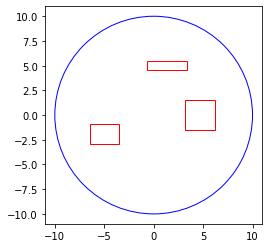

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_solution(individual, circle_radius):
    fig, ax = plt.subplots()
    circle = plt.Circle((0, 0), circle_radius, color='blue', fill=False)
    ax.add_artist(circle)
    for rect in individual:
        rectangle = patches.Rectangle((rect.x, rect.y), rect.width, rect.height, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)
    ax.set_xlim(-circle_radius-1, circle_radius+1)
    ax.set_ylim(-circle_radius-1, circle_radius+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

visualize_solution(best_individual, circle_radius)


# ver 2

# test 1

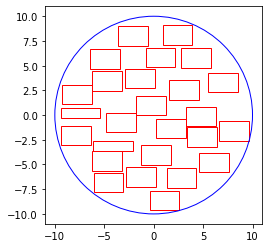

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_solution(individual, circle_radius):
    fig, ax = plt.subplots()
    circle = plt.Circle((0, 0), circle_radius, color='blue', fill=False)
    ax.add_artist(circle)
    for rect in individual:
        rectangle = patches.Rectangle((rect.x, rect.y), rect.width, rect.height, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)
    ax.set_xlim(-circle_radius-1, circle_radius+1)
    ax.set_ylim(-circle_radius-1, circle_radius+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

visualize_solution(best_individual, circle_radius)


# r800

In [19]:
import pandas as pd
file_path = 'r800.csv' 
data = pd.read_csv(file_path, header=None, names=['width', 'height', 'value'])

In [20]:
rectangles = [Rectangle(row['width'], row['height'], row['value']) for index, row in data.iterrows()]

In [21]:
circle_radius = 800
best_individual, best_fitness = genetic_algorithm(rectangles, circle_radius, generations=100)

print("Najlepsze rozmieszczenie prostokątów:")
print("Najlepsza wartość:", best_fitness)

Najlepsze rozmieszczenie prostokątów:
Najlepsza wartość: 7480


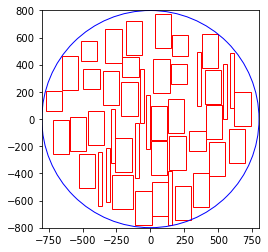

In [22]:
visualize_solution(best_individual, circle_radius)

# r850

In [26]:
import pandas as pd
file_path = 'r850.csv' 
data = pd.read_csv(file_path, header=None, names=['width', 'height', 'value'])
rectangles = [Rectangle(row['width'], row['height'], row['value']) for index, row in data.iterrows()]

In [27]:
circle_radius = 850
best_individual, best_fitness = genetic_algorithm(rectangles, circle_radius, generations=50)

print("Najlepsza wartość:", best_fitness)

Najlepsza wartość: 50190


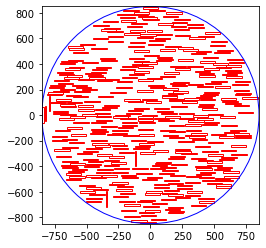

In [28]:
visualize_solution(best_individual, circle_radius)

# r1000

In [29]:
import pandas as pd
file_path = 'r1000.csv' 
data = pd.read_csv(file_path, header=None, names=['width', 'height', 'value'])
rectangles = [Rectangle(row['width'], row['height'], row['value']) for index, row in data.iterrows()]

In [33]:
circle_radius = 1000
best_individual, best_fitness = genetic_algorithm(rectangles, circle_radius, generations=100)
print("Najlepsza wartość:", best_fitness)

Najlepsza wartość: 12540


# 50 generacji

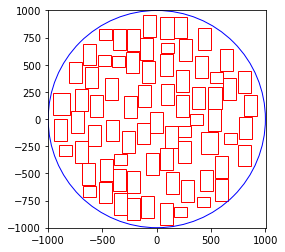

In [32]:
visualize_solution(best_individual, circle_radius)

# 100 generacji

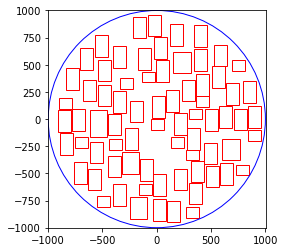

In [34]:
visualize_solution(best_individual, circle_radius)

# r1100

In [35]:
import pandas as pd
file_path = 'r1100.csv' 
data = pd.read_csv(file_path, header=None, names=['width', 'height', 'value'])
rectangles = [Rectangle(row['width'], row['height'], row['value']) for index, row in data.iterrows()]

In [36]:
circle_radius = 1100
best_individual, best_fitness = genetic_algorithm(rectangles, circle_radius, generations=100)

print("Najlepsze rozmieszczenie prostokątów:")

Najlepsze rozmieszczenie prostokątów:


In [38]:
best_fitness

7240

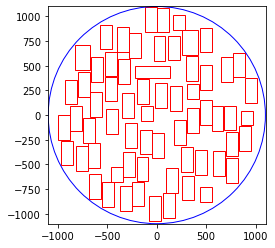

In [39]:
visualize_solution(best_individual, circle_radius)

# r1200

In [40]:
import pandas as pd
file_path = 'r1200.csv' 
data = pd.read_csv(file_path, header=None, names=['width', 'height', 'value'])
rectangles = [Rectangle(row['width'], row['height'], row['value']) for index, row in data.iterrows()]

In [41]:
circle_radius = 1200
best_individual, best_fitness = genetic_algorithm(rectangles, circle_radius, generations=100)

print("Najlepsza wartość:", best_fitness)

Najlepsza wartość: 18420


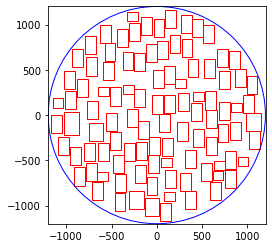

In [42]:
visualize_solution(best_individual, circle_radius)

In [46]:
circle_radius = 1200
best_individual, best_fitness = genetic_algorithm(rectangles, circle_radius, generations=500)

print("Najlepsza wartość:", best_fitness)

Najlepsza wartość: 18640


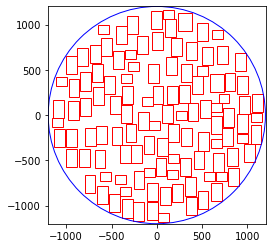

In [47]:
visualize_solution(best_individual, circle_radius)